<a href="https://colab.research.google.com/github/Sofigam00s/Procesamiento-del-habla-IA/blob/main/TP1_webscrapping_preprocesamiento_GamalloSofia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

**Gamallo Sofia Antonia**👩🏻


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [ ]:
# Primero instalo las librerías necesarias para el webscrapping
! pip install requests beautifulsoup4 html5lib

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# Cargo el url con el que voy a trabajar
url = 'https://ecoosfera.com/sci-innovacion/discurso-carl-sagan-punto-palido-azul-tierra-voyager-1/'
# Realizo la solicitud HTTP
respuesta = requests.get(url)
respuesta.raise_for_status()

In [ ]:
punto_azul = BeautifulSoup(respuesta.text, "html5lib")

In [ ]:
punto_azul.find("h1").get_text()

'El discurso más hermoso de Carl Sagan sobre el planeta Tierra (audio)'

In [ ]:
todos = punto_azul.find_all("p")

In [ ]:
texto = todos[7].get_text()
print(texto)

“Mira de nuevo ese punto. Eso es aquí. Ese es el hogar. Esos somos nosotros. En él, todos los que amas, todos los que conoces, todos los que has oído hablar, todos los seres humanos que alguna vez fueron, vivieron sus vidas. El conjunto de nuestras alegrías y sufrimientos, miles de religiones, ideologías y doctrinas económicas confiadas, cada cazador y recolector, cada héroe y cobarde, cada creador y destructor de civilizaciones, cada rey y campesino, cada joven pareja enamorada, cada madre y padre, niño esperanzado, inventor y explorador, todos los maestros de moral, todos los políticos corruptos, todas las “superestrellas”, todos los “líderes supremos”, todos los santos y pecadores en la historia de nuestra especie vivieron allí, en una mota de polvo suspendida en un rayo de sol.


## 2- Preprocesamiento

### 2.1 Muestra las stop words que tenga tu texto.

In [ ]:
# Para mostrar las stopword voy a utilizar la librería spacy
!pip install spacy

In [ ]:
import spacy #Importo la librería spacy, utilizo esta ibrería porque me resulta más facil para trabajar

In [ ]:
!python -m spacy download es_core_news_sm #Importo el diccionario en español

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 63.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('es_core_news_sm') #Descargo el diccionario

doc = nlp(texto) #Proceso el texto

for word in doc: #Imprimo las stopword
    if word.is_stop:
        print(word.text)

de
nuevo
ese
Eso
es
aquí
Ese
es
el
Esos
somos
nosotros
En
él
todos
los
que
todos
los
que
todos
los
que
todos
los
que
alguna
vez
fueron
sus
El
de
nuestras
y
de
y
cada
y
cada
y
cada
y
de
cada
y
cada
cada
y
y
todos
los
de
todos
los
todas
las
todos
los
todos
los
y
en
la
de
nuestra
allí
en
una
de
en
un
de


### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [ ]:
#Con ayuda de chatgpt limpio el texto con un blucle que elimine las stopword, los signos de puntuacion y los simbolos que no sean letras
limpiar_texto = [token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.is_alpha]
print(limpiar_texto)

['mira', 'punto', 'hogar', 'amas', 'conoces', 'has', 'oído', 'hablar', 'seres', 'humanos', 'vivieron', 'vidas', 'conjunto', 'alegrías', 'sufrimientos', 'miles', 'religiones', 'ideologías', 'doctrinas', 'económicas', 'confiadas', 'cazador', 'recolector', 'héroe', 'cobarde', 'creador', 'destructor', 'civilizaciones', 'rey', 'campesino', 'joven', 'pareja', 'enamorada', 'madre', 'padre', 'niño', 'esperanzado', 'inventor', 'explorador', 'maestros', 'moral', 'políticos', 'corruptos', 'superestrellas', 'líderes', 'supremos', 'santos', 'pecadores', 'historia', 'especie', 'vivieron', 'mota', 'polvo', 'suspendida', 'rayo', 'sol']


In [ ]:
texto_limpio = " ".join(limpiar_texto) #Uno todas las palabras
print(texto_limpio)

mira punto hogar amas conoces has oído hablar seres humanos vivieron vidas conjunto alegrías sufrimientos miles religiones ideologías doctrinas económicas confiadas cazador recolector héroe cobarde creador destructor civilizaciones rey campesino joven pareja enamorada madre padre niño esperanzado inventor explorador maestros moral políticos corruptos superestrellas líderes supremos santos pecadores historia especie vivieron mota polvo suspendida rayo sol


In [ ]:
#Importo las librerías necesarias para wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

In [ ]:
#prompt: que la figura tenga colores rosas
def pink_color_func(word, **kwargs):
  return "hsl({}, {}%, {}%)".format(random.randint(300, 350), random.randint(60, 100), random.randint(60, 90))

In [ ]:
#Creo el wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=pink_color_func).generate(texto_limpio)

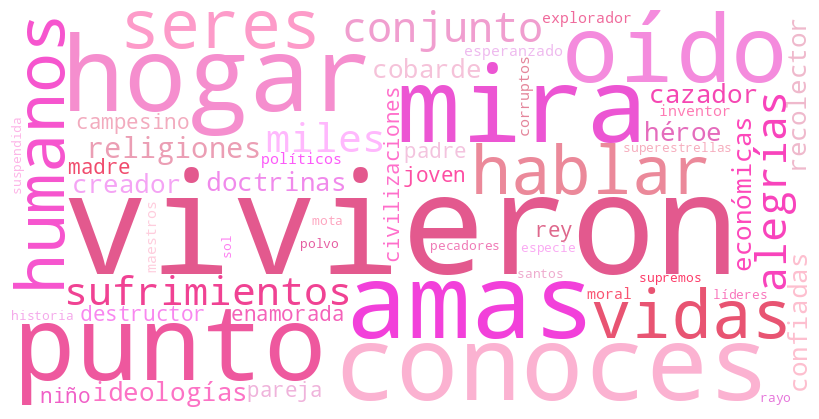

In [ ]:
#Lo imprrimo
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [ ]:
#Con ayuda de chatgpt descompongo en oraciones el texto
doc = nlp(texto)

# Dividir en oraciones
oraciones = [sent.text for sent in doc.sents]

# Mostrar el resultado
for i, oracion in enumerate(oraciones, 1):
    print(f"{i}: {oracion}")

1: “Mira de nuevo ese punto.
2: Eso es aquí.
3: Ese es el hogar.
4: Esos somos nosotros.
5: En él, todos los que amas, todos los que conoces, todos los que has oído hablar, todos los seres humanos que alguna vez fueron, vivieron sus vidas.
6: El conjunto de nuestras alegrías y sufrimientos, miles de religiones, ideologías y doctrinas económicas confiadas, cada cazador y recolector, cada héroe y cobarde, cada creador y destructor de civilizaciones, cada rey y campesino, cada joven pareja enamorada, cada madre y padre, niño esperanzado, inventor y explorador, todos los maestros de moral, todos los políticos corruptos, todas las “superestrellas”, todos los “líderes supremos”, todos los santos y pecadores en la historia de nuestra especie vivieron allí, en una mota de polvo suspendida en un rayo de sol.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Crear el vectorizador
vectorizer = CountVectorizer()

# Ajustar y transformar las oraciones
matriz = vectorizer.fit_transform(oraciones)

# Mostrar la matriz
print(f'Matriz:\n',matriz.toarray())

Matriz:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
  0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 4 0 0 0 0 0 1 0 0 0 0
  0 1 0 0 4 0 0 1 1 1 1]
 [1 0 1 0 0 6 1 1 1 1 1 1 0 1 1 7 1 1 1 1 3 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1
  1 1 1 1 1 4 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 


#### 2.3.2 Determina la longitud de tu vocabulario.

In [ ]:
# Muestro las palabras del vocabulario
print(vectorizer.get_feature_names_out())

['alegrías' 'alguna' 'allí' 'amas' 'aquí' 'cada' 'campesino' 'cazador'
 'civilizaciones' 'cobarde' 'confiadas' 'conjunto' 'conoces' 'corruptos'
 'creador' 'de' 'destructor' 'doctrinas' 'económicas' 'el' 'en'
 'enamorada' 'es' 'ese' 'eso' 'esos' 'especie' 'esperanzado' 'explorador'
 'fueron' 'hablar' 'has' 'historia' 'hogar' 'humanos' 'héroe' 'ideologías'
 'inventor' 'joven' 'la' 'las' 'los' 'líderes' 'madre' 'maestros' 'miles'
 'mira' 'moral' 'mota' 'niño' 'nosotros' 'nuestra' 'nuestras' 'nuevo'
 'oído' 'padre' 'pareja' 'pecadores' 'polvo' 'políticos' 'punto' 'que'
 'rayo' 'recolector' 'religiones' 'rey' 'santos' 'seres' 'sol' 'somos'
 'sufrimientos' 'superestrellas' 'supremos' 'sus' 'suspendida' 'todas'
 'todos' 'un' 'una' 'vez' 'vidas' 'vivieron' 'él']


In [ ]:
#Determino la longitud
longitud = len(vectorizer.get_feature_names_out())
print(f'Longitud del vocabulario:', longitud)

Longitud del vocabulario: 83



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a las oraciones
tfidf_vectorizer.fit(oraciones)

# Obtener la representación TF-IDF
tfidf_matrix = tfidf_vectorizer.transform(oraciones)

# Mostrar la matriz TF-IDF
print(tfidf_matrix.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.39339985 0.         0.
  0.         0.         0.         0.         0.         0.39339985
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.47974754 0.
  0.         0.         0.         0.         0.         0.47974754
  0.         0.         0.         0.         0.         0.
  0.47974754 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.61171251 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.

# Conclusiones

Fue un trabajo desafiante que me permitió comprender adecuadamente el uso que se le pueden dar a las paginas web con una limpieza, extracción y posterior análisis de texto.

Con la ayuda de las clases, los colab de la materia y el uso responsable de chatgpt, aprendí a importar el texto desde una url, luego buscar el párrafo específico que quería y apartir de ahí comenzar a limpiarlo.

En cuanto a la conclusión del trabajo que realice, pude notar que contenía una gran catidad de stopwords, y era un texto bastante estádar ya que no contenía símbolos o emojis. En mi caso me bastó utilizar solamente la librería spacy para poder limpiar todo el texto.
En el wordcloud se refleja muy claro lo que se describe en el texto, se puede entender que está hablando del plantea Tierra.
Por último pude notar que mi matriz TF-IDF fue mucho más grande que la de mis compañeros, tal vez porque mi texto era un poco largo.

# ENTREGA




# Anexo, código de ejemplo del uso de wordcloud

Instalar e importar la librería

In [ ]:
# instalar wordcloud
!pip install wordcloud


In [ ]:

# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)


Mostramos la imagen generada

In [ ]:

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Modificamos el ejemplo anterior agregando palabras en español que no queremos que considere para crear la nube de palabras. Estas son las stop_words



In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "Este es un texto de ejemplo para crear una nube de palabras usando word cloud. Puedes reemplazar este texto utilizando tu propio texto."

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_es).generate(text)

# Mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
